In [1]:
#Comenzamos importando las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Importamos el archivo de excel sobre el que vamos a trabajar
tabla = pd.read_excel('C:/Users/juan_/Desktop/Tabla_ajuste_CC.xlsx')
tabla

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Plan nutriconal hasta los 35 días de gestación,NACIDOS TOTALES SIGUIENTE PARTO,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,Plan hasta los 35 días,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27 00:00:00,NaN,2252,...,Cerda Flaca,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27 00:00:00,NaN,5167,...,Cerda Flaca,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27 00:00:00,NaN,6043,...,Cerda Flaca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,2023.0,0522,CG36,Choice,7.0,2022-09-17,2023-01-11,2023-01-31 00:00:00,Lactancia PS,5315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,2023.0,0522,TN70,Topigs,7.0,2022-09-18,2023-01-09,2023-01-31 00:00:00,Lactancia PS,0023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,2023.0,0522,TN70,Topigs,7.0,2022-09-17,2023-01-11,2023-01-31 00:00:00,Lactancia PS,0024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,2023.0,0522,TN70,Topigs,7.0,2022-09-21,2023-01-17,2023-02-02 00:00:00,Lactancia PS,0271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Visualizamos que tipo de dato tiene cada columna
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Año                                             1253 non-null   float64       
 1   Grupo de servicio (a que va a pertenecer)       1253 non-null   object        
 2   Línea                                           1252 non-null   object        
 3   Genética                                        1252 non-null   object        
 4   Maternidad                                      1253 non-null   float64       
 5   Fecha servicio                                  1253 non-null   datetime64[ns]
 6   Fecha de parto                                  1253 non-null   datetime64[ns]
 7   Fecha destete                                   1238 non-null   object        
 8   Ración de Lactancia utilizada                   

In [4]:
#tabla.shape
print('Cantidad de filas: ' + str(tabla.shape[0]))
print('Cantidad de columnas: ' + str(tabla.shape[1]))

Cantidad de filas: 1417
Cantidad de columnas: 37


In [5]:
#Visualizamos el nombre de las columnas
tabla.columns

Index(['Año', 'Grupo de servicio (a que va a pertenecer)', 'Línea', 'Genética',
       'Maternidad', 'Fecha servicio', 'Fecha de parto', 'Fecha destete',
       'Ración de Lactancia utilizada', 'RP cerda', 'Ciclo',
       'Peso de la cerda pre-parto (kg)', 'CC Preparto', 'Total de nacidos',
       'Nacidos vivos', 'Peso total de la camada (kg)',
       'Total destetados por camada', 'Peso de la camada destetada (kg)',
       'Peso de la cerda post-parto (kg)', 'CC postparto', 'Días de lactancia',
       'IDC próximo servicio', 'Peso Cúaron NO MODIFICAR', 'Rp Cerda',
       'Paridad', 'Pérdida % de peso', 'Balance energético',
       'Plan nutriconal hasta los 35 días de gestación',
       'NACIDOS TOTALES SIGUIENTE PARTO', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36'],
      dtype='object')

In [6]:
#Visualizamos las primeras filas de la tabla para ver como salen
print('Visualizamos las primeras 5 instancias o filas')
tabla.head(5)

Visualizamos las primeras 5 instancias o filas


,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Plan nutriconal hasta los 35 días de gestación,NACIDOS TOTALES SIGUIENTE PARTO,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,Plan hasta los 35 días,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27 00:00:00,NaN,2252,...,Cerda Flaca,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27 00:00:00,NaN,5167,...,Cerda Flaca,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27 00:00:00,NaN,6043,...,Cerda Flaca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Visualizamos las ultimas filas de la tabla para ver como salen
print('Visualizamos las primeras 5 instancias o filas')
tabla.tail(5)

Visualizamos las primeras 5 instancias o filas


,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Plan nutriconal hasta los 35 días de gestación,NACIDOS TOTALES SIGUIENTE PARTO,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
1412,2023.0,0522,CG36,Choice,7.0,2022-09-17,2023-01-11,2023-01-31 00:00:00,Lactancia PS,5315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,2023.0,0522,TN70,Topigs,7.0,2022-09-18,2023-01-09,2023-01-31 00:00:00,Lactancia PS,0023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,2023.0,0522,TN70,Topigs,7.0,2022-09-17,2023-01-11,2023-01-31 00:00:00,Lactancia PS,0024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,2023.0,0522,TN70,Topigs,7.0,2022-09-21,2023-01-17,2023-02-02 00:00:00,Lactancia PS,0271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,2023.0,0522,TZZZZ,Topigs,8.0,2022-09-16,2023-01-04,2023-02-01 00:00:00,Lactancia PS,GNTH3356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En las siguientes líneas de código, visualizamos la cantidad de valores nan (nulos) de las diferentes variables. Esto nos sirve para tomar decisiones acerca de si es necesario eliminar columnas y/o reemplzar estos valores nan, ya que en caso de no hacerlo me van a dificultar la preparacíon de los datos para un posterior analísis.

In [8]:
#Vemos que variables tienen valores nan y las cantidades
tabla.isna().sum()

Año                                                164
Grupo de servicio (a que va a pertenecer)          164
Línea                                              165
Genética                                           165
Maternidad                                         164
Fecha servicio                                     164
Fecha de parto                                     164
Fecha destete                                      179
Ración de Lactancia utilizada                      726
RP cerda                                           165
Ciclo                                              164
Peso de la cerda pre-parto (kg)                    172
CC Preparto                                        235
Total de nacidos                                   164
Nacidos vivos                                      164
Peso total de la camada (kg)                       164
Total destetados por camada                        180
Peso de la camada destetada (kg)                   180
Peso de la

Vemos que hay varias variables que en su totalidad presentan valores nan, entonces procedemos a eliminarlas, junto con alguna que consideremos de poca importancia.

In [9]:
#Eliminamos las columnas que al comienzo ya se que no necesito o están repetidas como Rp Cerda
tabla = tabla.drop(['Rp Cerda', 'Paridad', 'Plan nutriconal hasta los 35 días de gestación', 'Unnamed: 29', 'Unnamed: 30',
           'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
           'Unnamed: 35', 'Unnamed: 36'], axis=1)

print('Cantidad de filas despues de eliminar variables:' + str(tabla.shape[0]))
print('Cantidad de columnas despues de eliminar variables:' + str(tabla.shape[1]))

tabla.head()

Cantidad de filas despues de eliminar variables:1417
Cantidad de columnas despues de eliminar variables:26


,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso Cúaron NO MODIFICAR,Pérdida % de peso,Balance energético,NACIDOS TOTALES SIGUIENTE PARTO
0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pérdida de peso,Balance energético (BE),NaN
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27 00:00:00,NaN,2252,...,11.0,65,219,NaN,21,4,289.43682,-0.321629,Negativo,22
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27 00:00:00,NaN,5167,...,15.0,107,178,NaN,20,4,242.01254,-0.359621,Negativo,14
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27 00:00:00,NaN,6043,...,12.0,55,177,NaN,17,13,195.66624,-0.105459,Negativo,NaN


Luego de imprimir la tabla en pantalla una vez que eliminamos las variables seleccionadas, vemos que hay instancias (filas) que presentan casi en su totalidad valores nan, como por ejemplo las instancias del indice 0 y 1. Entonces procedemos a eliminar la fila completa, ya que no tienen importancia. Aparecen de esa forma por como es el archivo original importado desde Excel.

In [10]:
#Ahora eliminamos todas las filas que no poseen datos, me doy cuenta porque tiene valores nan la fila completa 
tabla = tabla[tabla['Maternidad'].notna()]

print('Cantidad de filas despues de eliminar instancias:' + str(tabla.shape[0]))
print('Cantidad de columnas despues de eliminar instancias:' + str(tabla.shape[1]))

tabla.head()

Cantidad de filas despues de eliminar instancias:1253
Cantidad de columnas despues de eliminar instancias:26


,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso Cúaron NO MODIFICAR,Pérdida % de peso,Balance energético,NACIDOS TOTALES SIGUIENTE PARTO
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27 00:00:00,NaN,2252,...,11.0,65,219,NaN,21,4,289.43682,-0.321629,Negativo,22
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27 00:00:00,NaN,5167,...,15.0,107,178,NaN,20,4,242.01254,-0.359621,Negativo,14
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27 00:00:00,NaN,6043,...,12.0,55,177,NaN,17,13,195.66624,-0.105459,Negativo,NaN
5,2019.0,4819,Naima,Choice,7.0,2019-07-16,2019-11-09,2019-11-27 00:00:00,NaN,5119,...,8.0,55,167,NaN,18,20,186.27223,-0.115403,Negativo,NaN
8,2019.0,4919,Naima,Choice,2.0,2019-07-21,2019-11-12,2019-12-04 00:00:00,NaN,2181B,...,13.0,92,223,NaN,22,16,265.56755,-0.190886,Negativo,20


Luego de eliminar las instancias y variables que consideramos que no vamos a tener en cuenta, volvemos a visualizar la cantidad de valores nan que tenemos por columna o variable:

In [11]:
#Vemos que variables tienen valores nan y las cantidades
tabla.isna().sum()

Año                                            0
Grupo de servicio (a que va a pertenecer)      0
Línea                                          1
Genética                                       1
Maternidad                                     0
Fecha servicio                                 0
Fecha de parto                                 0
Fecha destete                                 15
Ración de Lactancia utilizada                562
RP cerda                                       1
Ciclo                                          0
Peso de la cerda pre-parto (kg)                8
CC Preparto                                   71
Total de nacidos                               0
Nacidos vivos                                  0
Peso total de la camada (kg)                   0
Total destetados por camada                   16
Peso de la camada destetada (kg)              16
Peso de la cerda post-parto (kg)              17
CC postparto                                  89
Días de lactancia   

Siguiendo con la preparacion de los datos, vimos arriba cuando imprimimos los valores nan por variable, y la que presenta mayor cantidad es 'Ración de Lactancia utilizada'. Pero tomamos la decisión de reemplazarlos por el nombre de la ración de lactancia que sabemos que utilizamos, llamada 'Top Verano':

In [12]:
#Utilizamos el unique para conocer los tipos de ración lactancia que aparecen en la columna
tabla['Ración de Lactancia utilizada'].unique()

array([nan, 'Lactancia Full (Adi)', 'Lactancia PS'], dtype=object)

In [13]:
#Visualizamos las filas donde terminan los nan y comienzan las raciones de Lactancia Full, para ver una vez que reemplazamos los 
#nan por Top Verano quedo bien hecho.
tabla[560:565]

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso Cúaron NO MODIFICAR,Pérdida % de peso,Balance energético,NACIDOS TOTALES SIGUIENTE PARTO
680,2021.0,BANDA 0621,Naima,Choice,7.0,2021-01-11,2021-05-05,2021-05-26 00:00:00,NaN,5919,...,13.0,84,252,BUENA,21,NaN,273.877728,-0.086816,Neutro,14
681,2021.0,BANDA 0621,Naima,Choice,7.0,2021-01-11,2021-05-05,2021-05-26 00:00:00,NaN,5843,...,11.0,70,260,BUENA,21,NaN,273.01069,-0.050041,Neutro,-
684,2021.0,BANDA 0721,Naima,Choice,1.0,2021-02-04,2021-05-30,2021-06-22 00:00:00,Lactancia Full (Adi),4209,...,5.0,41.5,319,GORDA,23,NaN,299.311025,0.061721,Positivo,-
685,2021.0,BANDA 0721,TN70,Topigs,1.0,2021-02-04,2021-06-01,2021-06-24 00:00:00,Lactancia Full (Adi),1036,...,12.0,81,246,BUENA,23,NaN,249.450503,-0.014026,Neutro,25
686,2021.0,BANDA 0721,TN70,Topigs,1.0,2021-02-07,2021-06-02,2021-06-23 00:00:00,Lactancia Full (Adi),7860,...,11.0,80,247,BUENA,21,NaN,244.391357,0.010561,Positivo,19


Hasta el indice 681 la ración de lactancia utilizada presenta valores nan, y a partir del indice 684 presenta datos, en este caso Lactancia Full (Adi).

In [14]:
#Con la función map buscamos reemplazar los valores nan por el nombre de la ración utilizada, en este caso es Top Verano.
tabla['Ración de Lactancia utilizada'] = tabla['Ración de Lactancia utilizada'].map({'Lactancia Full (Adi)':'Lactancia Full',
                                                                                       'Lactancia PS': 'Lactancia PS',
                                                                                       np.nan:'Lactancia TV'}, na_action=None)
#tabla
tabla.head()

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso Cúaron NO MODIFICAR,Pérdida % de peso,Balance energético,NACIDOS TOTALES SIGUIENTE PARTO
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27 00:00:00,Lactancia TV,2252,...,11.0,65,219,NaN,21,4,289.43682,-0.321629,Negativo,22
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27 00:00:00,Lactancia TV,5167,...,15.0,107,178,NaN,20,4,242.01254,-0.359621,Negativo,14
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27 00:00:00,Lactancia TV,6043,...,12.0,55,177,NaN,17,13,195.66624,-0.105459,Negativo,NaN
5,2019.0,4819,Naima,Choice,7.0,2019-07-16,2019-11-09,2019-11-27 00:00:00,Lactancia TV,5119,...,8.0,55,167,NaN,18,20,186.27223,-0.115403,Negativo,NaN
8,2019.0,4919,Naima,Choice,2.0,2019-07-21,2019-11-12,2019-12-04 00:00:00,Lactancia TV,2181B,...,13.0,92,223,NaN,22,16,265.56755,-0.190886,Negativo,20


In [15]:
#Vemos si se completo bien con ración 'Lactancia TV' en la porción del dataset visualizada anteriormente
tabla[560:565]

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso Cúaron NO MODIFICAR,Pérdida % de peso,Balance energético,NACIDOS TOTALES SIGUIENTE PARTO
680,2021.0,BANDA 0621,Naima,Choice,7.0,2021-01-11,2021-05-05,2021-05-26 00:00:00,Lactancia TV,5919,...,13.0,84,252,BUENA,21,NaN,273.877728,-0.086816,Neutro,14
681,2021.0,BANDA 0621,Naima,Choice,7.0,2021-01-11,2021-05-05,2021-05-26 00:00:00,Lactancia TV,5843,...,11.0,70,260,BUENA,21,NaN,273.01069,-0.050041,Neutro,-
684,2021.0,BANDA 0721,Naima,Choice,1.0,2021-02-04,2021-05-30,2021-06-22 00:00:00,Lactancia Full,4209,...,5.0,41.5,319,GORDA,23,NaN,299.311025,0.061721,Positivo,-
685,2021.0,BANDA 0721,TN70,Topigs,1.0,2021-02-04,2021-06-01,2021-06-24 00:00:00,Lactancia Full,1036,...,12.0,81,246,BUENA,23,NaN,249.450503,-0.014026,Neutro,25
686,2021.0,BANDA 0721,TN70,Topigs,1.0,2021-02-07,2021-06-02,2021-06-23 00:00:00,Lactancia Full,7860,...,11.0,80,247,BUENA,21,NaN,244.391357,0.010561,Positivo,19


Volvemos a visualizar la cantidad de valores nan que tenemos por columna o variable:

In [16]:
tabla.isna().sum()

Año                                            0
Grupo de servicio (a que va a pertenecer)      0
Línea                                          1
Genética                                       1
Maternidad                                     0
Fecha servicio                                 0
Fecha de parto                                 0
Fecha destete                                 15
Ración de Lactancia utilizada                  0
RP cerda                                       1
Ciclo                                          0
Peso de la cerda pre-parto (kg)                8
CC Preparto                                   71
Total de nacidos                               0
Nacidos vivos                                  0
Peso total de la camada (kg)                   0
Total destetados por camada                   16
Peso de la camada destetada (kg)              16
Peso de la cerda post-parto (kg)              17
CC postparto                                  89
Días de lactancia   

In [17]:
#Primero modificamos el nombre de algunas columnas
tabla = tabla.rename(columns={'Pérdida % de peso':'Pérdida de peso (%)',
                             'Peso Cúaron NO MODIFICAR':'Peso de la cerda cúaron (kg)',
                             'NACIDOS TOTALES SIGUIENTE PARTO':'Nacidos totales sig. parto' })

#tabla.columns

En una primera etapa de análisis de datos nos vamos a focalizar en la variable de pérdida de peso corporal de las cerdas. Las variables 'IDC próximo servicio' y 'Nacidos totales sig. parto' serían muy interesantes de evaluar, pero como presentan una gran cantidad de valores nulos, procedemos a eliminarlas para esta primer evaluación del dataset.

Pero guardamos los datos como dataframe 'tabla_con_IDC' para poder trabajar más adelante.

In [18]:
#Guardamos el dataframe generado hasta aquí para poder utilizarlo para analizar IDC y Nacidos totales siguiente parto
tabla_con_IDC=tabla

print('Valores de Nacidos totales sig. parto:')
print(tabla_con_IDC['Nacidos totales sig. parto'].unique()) #No se le puede hacer sort_values porque el tipo de dato es str??
print('Filas/Columnas')
tabla_con_IDC.shape

Valores de Nacidos totales sig. parto:
[22 14 nan 20 11 17 15 19 25 16 4 7 21 18 '-' 12 13 24 9 29 10 23 6 8 5 2
 27 26]
Filas/Columnas


(1253, 26)

In [19]:
#Ahora sí, eliminamos las columnas con las que no vamos a trabajar en esta primera parte
tabla = tabla.drop(['IDC próximo servicio', 'Nacidos totales sig. parto'], axis=1)

print('Cantidad de filas despues de eliminar IDC y Nacidos totales:' + str(tabla.shape[0]))
print('Cantidad de columnas despues de eliminar IDC y Nacidos totales:' + str(tabla.shape[1]))

#tabla.head()

Cantidad de filas despues de eliminar IDC y Nacidos totales:1253
Cantidad de columnas despues de eliminar IDC y Nacidos totales:24


In [20]:
#Visualizamos que tipo de dato tenemos para las variables
tabla.dtypes

Año                                                 float64
Grupo de servicio (a que va a pertenecer)            object
Línea                                                object
Genética                                             object
Maternidad                                          float64
Fecha servicio                               datetime64[ns]
Fecha de parto                               datetime64[ns]
Fecha destete                                        object
Ración de Lactancia utilizada                        object
RP cerda                                             object
Ciclo                                               float64
Peso de la cerda pre-parto (kg)                      object
CC Preparto                                          object
Total de nacidos                                    float64
Nacidos vivos                                       float64
Peso total de la camada (kg)                        float64
Total destetados por camada             

In [21]:
tabla.isna().sum()

Año                                           0
Grupo de servicio (a que va a pertenecer)     0
Línea                                         1
Genética                                      1
Maternidad                                    0
Fecha servicio                                0
Fecha de parto                                0
Fecha destete                                15
Ración de Lactancia utilizada                 0
RP cerda                                      1
Ciclo                                         0
Peso de la cerda pre-parto (kg)               8
CC Preparto                                  71
Total de nacidos                              0
Nacidos vivos                                 0
Peso total de la camada (kg)                  0
Total destetados por camada                  16
Peso de la camada destetada (kg)             16
Peso de la cerda post-parto (kg)             17
CC postparto                                 89
Días de lactancia                       

In [22]:
#Eliminamos las filas con valores nan que presentan las columnas enumeradas en subset
tabla_filt = tabla.dropna(subset=['Peso de la cerda pre-parto (kg)', 'Total destetados por camada','Peso de la camada destetada (kg)',
                    'Peso de la cerda post-parto (kg)', 'Peso de la cerda cúaron (kg)', 'Balance energético'])

print('Valores nulos del dataframe TABLA luego de la eliminación')
tabla_filt.isna().sum()

Valores nulos del dataframe TABLA luego de la eliminación


Año                                           0
Grupo de servicio (a que va a pertenecer)     0
Línea                                         1
Genética                                      1
Maternidad                                    0
Fecha servicio                                0
Fecha de parto                                0
Fecha destete                                 0
Ración de Lactancia utilizada                 0
RP cerda                                      0
Ciclo                                         0
Peso de la cerda pre-parto (kg)               0
CC Preparto                                  65
Total de nacidos                              0
Nacidos vivos                                 0
Peso total de la camada (kg)                  0
Total destetados por camada                   0
Peso de la camada destetada (kg)              0
Peso de la cerda post-parto (kg)              0
CC postparto                                 65
Días de lactancia                       

In [23]:
print('Cantidad de filas despues de eliminar valores nan:' + str(tabla_filt.shape[0]))
print('Cantidad de columnas despues de eliminar valores nan:' + str(tabla_filt.shape[1]))

#tabla.head()

Cantidad de filas despues de eliminar valores nan:1213
Cantidad de columnas despues de eliminar valores nan:24


In [24]:
#Pasamos la columna fecha destete a formato datetime
#tabla['Fecha de destete'] = pd.to_datetime(tabla['Fecha destete'])

Algunas de las variables númericas presentan un tipo de dato como string, entonces debemos cambiarlas a un tipo de dato númerico (int o float). Comenzamos viendo cada una de estas variables númericas para ver cúales son las que hay que modificar

También debemos reemplazar datos que figuran como '-', porque no me permiten modificar el tipo de dato.

In [25]:
#Aca vemos que aparecen guiones medios '-' y debemos reemplazarlos
tabla_filt['Peso de la cerda pre-parto (kg)'].unique()

array([307, 272, 216, 205, 288, 274, 266, 246, 235, 212, 279, 263, 232,
       227, 215, 233, 242, 219, 284, 228, 234, 208, 261, 276, 191, 241,
       221, 254, 287, 237, 244, 204, 229, 256, 289, 230, 271, 248, 239,
       252, 282, 298, 251, 277, 306, 218, 286, 273, 292, 206, 238, 201,
       247, 322, 278, 259, 318, 224, 220, 291, 264, 240, 299, 290, 320,
       223, 222, 275, 202, 198, 260, 304, 245, 225, 226, 270, 265, 262,
       255, 249, 310, 258, 313, 250, 305, 312, 231, 283, 253, 269, 329,
       323, 280, 268, 294, 311, 335, 295, 338, 293, 214, 330, 324, 325,
       331, 267, 321, 297, 194, 200, 281, 217, 192, 327, 315, 195, 236,
       213, 257, '-', 316, 303, 296, 340, 301, 333, 197, 302, 243, 360,
       309, 199, 300, 339, 314, 348, 207, 209, 317, 308, 342, 319, 337,
       345, 344, 326, 203, 285, 173, 211, 334, 196, 186, 341, 183, 182,
       210, 193, 188, 171, 187, 178, 190, 336, 184, 328, 180, 393, 350],
      dtype=object)

In [26]:
#Reemplazamos los '-' por nan
tabla_filt = tabla_filt.replace('-', np.nan)

In [27]:
#Volvemos a hacer el unique para ver si el '-' fue reemplazado correctamente por los nan
tabla_filt['Peso de la cerda pre-parto (kg)'].unique()

array([307., 272., 216., 205., 288., 274., 266., 246., 235., 212., 279.,
       263., 232., 227., 215., 233., 242., 219., 284., 228., 234., 208.,
       261., 276., 191., 241., 221., 254., 287., 237., 244., 204., 229.,
       256., 289., 230., 271., 248., 239., 252., 282., 298., 251., 277.,
       306., 218., 286., 273., 292., 206., 238., 201., 247., 322., 278.,
       259., 318., 224., 220., 291., 264., 240., 299., 290., 320., 223.,
       222., 275., 202., 198., 260., 304., 245., 225., 226., 270., 265.,
       262., 255., 249., 310., 258., 313., 250., 305., 312., 231., 283.,
       253., 269., 329., 323., 280., 268., 294., 311., 335., 295., 338.,
       293., 214., 330., 324., 325., 331., 267., 321., 297., 194., 200.,
       281., 217., 192., 327., 315., 195., 236., 213., 257.,  nan, 316.,
       303., 296., 340., 301., 333., 197., 302., 243., 360., 309., 199.,
       300., 339., 314., 348., 207., 209., 317., 308., 342., 319., 337.,
       345., 344., 326., 203., 285., 173., 211., 33

In [28]:
print('Valores nulos del dataframe TABLA_FILT luego de reemplazar los - por nan')
tabla_filt.isna().sum()

Valores nulos del dataframe TABLA_FILT luego de reemplazar los - por nan


Año                                           0
Grupo de servicio (a que va a pertenecer)     0
Línea                                         1
Genética                                      1
Maternidad                                    0
Fecha servicio                                0
Fecha de parto                                0
Fecha destete                                 1
Ración de Lactancia utilizada                 0
RP cerda                                      0
Ciclo                                         0
Peso de la cerda pre-parto (kg)               4
CC Preparto                                  66
Total de nacidos                              0
Nacidos vivos                                 0
Peso total de la camada (kg)                  0
Total destetados por camada                   0
Peso de la camada destetada (kg)              1
Peso de la cerda post-parto (kg)              2
CC postparto                                 66
Días de lactancia                       

In [29]:
print('Cantidad de filas antes de eliminar valores nan utilizados en reemplazo de - : ' + str(tabla_filt.shape[0]))
print('Cantidad de columnas antes de eliminar valores nan utilizados en reemplazo de - : ' + str(tabla_filt.shape[1]))

#Eliminamos las filas con valores nan que presentan las columnas enumeradas en subset
tabla_filt = tabla_filt.dropna(subset=['Peso de la cerda pre-parto (kg)', 'Peso de la camada destetada (kg)',
                    'Peso de la cerda post-parto (kg)', 'Peso de la cerda cúaron (kg)', 'Pérdida de peso (%)'])
print()
print('Cantidad de filas después de eliminar valores nan utilizados en reemplazo de - : ' + str(tabla_filt.shape[0]))
print('Cantidad de columnas después de eliminar valores nan utilizados en reemplazo de - : ' + str(tabla_filt.shape[1]))
print()
print('Valores nulos del dataframe TABLA_FILT luego de la eliminación')
tabla_filt.isna().sum()

Cantidad de filas antes de eliminar valores nan utilizados en reemplazo de - : 1213
Cantidad de columnas antes de eliminar valores nan utilizados en reemplazo de - : 24

Cantidad de filas después de eliminar valores nan utilizados en reemplazo de - : 1208
Cantidad de columnas después de eliminar valores nan utilizados en reemplazo de - : 24

Valores nulos del dataframe TABLA_FILT luego de la eliminación


Año                                           0
Grupo de servicio (a que va a pertenecer)     0
Línea                                         1
Genética                                      1
Maternidad                                    0
Fecha servicio                                0
Fecha de parto                                0
Fecha destete                                 0
Ración de Lactancia utilizada                 0
RP cerda                                      0
Ciclo                                         0
Peso de la cerda pre-parto (kg)               0
CC Preparto                                  65
Total de nacidos                              0
Nacidos vivos                                 0
Peso total de la camada (kg)                  0
Total destetados por camada                   0
Peso de la camada destetada (kg)              0
Peso de la cerda post-parto (kg)              0
CC postparto                                 65
Días de lactancia                       

Hemos decidido eliminar los valores nan que utilizamos para reemplazar por los '-', ya que eran pocas instancias, más precisamente solo 5. Se pudieron haber reemplazado por un valor promedio por ejemplo, pero quizás es para casos donde la cantidad de instancias con valores nan representa un porcentaje más alto de los datos.

In [30]:
#Modificamos los tipos de datos a str, int o float según corresponda
tabla_filt['Maternidad'] = tabla_filt['Maternidad'].astype('str')
tabla_filt['Ciclo'] = tabla_filt['Ciclo'].astype('int')
tabla_filt['Peso de la cerda pre-parto (kg)'] = tabla_filt['Peso de la cerda pre-parto (kg)'].astype('int')
tabla_filt['Peso de la camada destetada (kg)'] = tabla_filt['Peso de la camada destetada (kg)'].astype('float')
tabla_filt['Peso de la cerda post-parto (kg)'] = tabla_filt['Peso de la cerda post-parto (kg)'].astype('int')
tabla_filt['Días de lactancia'] = tabla_filt['Días de lactancia'].astype('int')
tabla_filt['Peso de la cerda cúaron (kg)'] = tabla_filt['Peso de la cerda cúaron (kg)'].astype('int')
tabla_filt['Pérdida de peso (%)'] = tabla_filt['Pérdida de peso (%)'].astype('float')

In [31]:
tabla_filt.dtypes

Año                                                 float64
Grupo de servicio (a que va a pertenecer)            object
Línea                                                object
Genética                                             object
Maternidad                                           object
Fecha servicio                               datetime64[ns]
Fecha de parto                               datetime64[ns]
Fecha destete                                datetime64[ns]
Ración de Lactancia utilizada                        object
RP cerda                                             object
Ciclo                                                 int32
Peso de la cerda pre-parto (kg)                       int32
CC Preparto                                          object
Total de nacidos                                    float64
Nacidos vivos                                       float64
Peso total de la camada (kg)                        float64
Total destetados por camada             

Ahora vamos a pasar los datos de la columna 'Pérdida de peso (%)' a valores con porcentaje para lograr una mejor visualización de los valores:

In [32]:
#Multiplicamos por 100 la columna 'Pérdida de peso (%)' y generamos una columna nueva en donde se guarden esos resultados
tabla_filt['% de pérdida de peso']=tabla_filt['Pérdida de peso (%)']*100

####IMPORTANTE: Ejecutar esta celda de código más de una vez no modifica los valores de la columna creada??????

In [33]:
#Comprobamos que la multipliación se haya hecho correctamente:
tabla_filt.head()
#tabla_filt.tail()

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Peso total de la camada (kg),Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,Peso de la cerda cúaron (kg),Pérdida de peso (%),Balance energético,% de pérdida de peso
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27,Lactancia TV,2252,...,17.78,11.0,65.0,219,NaN,21,289,-0.321629,Negativo,-32.162932
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27,Lactancia TV,5167,...,26.66,15.0,107.0,178,NaN,20,242,-0.359621,Negativo,-35.962101
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27,Lactancia TV,6043,...,14.96,12.0,55.0,177,NaN,17,195,-0.105459,Negativo,-10.545898
5,2019.0,4819,Naima,Choice,7.0,2019-07-16,2019-11-09,2019-11-27,Lactancia TV,5119,...,13.17,8.0,55.0,167,NaN,18,186,-0.115403,Negativo,-11.540257
8,2019.0,4919,Naima,Choice,2.0,2019-07-21,2019-11-12,2019-12-04,Lactancia TV,2181B,...,20.45,13.0,92.0,223,NaN,22,265,-0.190886,Negativo,-19.088587


In [34]:
#Eliminamos la columna 'Pérdida de peso (%)'
tabla_filt = tabla_filt.drop(['Pérdida de peso (%)'], axis=1)
#Volvemos a visualizar el dataframe para comprobar la correcta eliminación:
tabla_filt.head()

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Nacidos vivos,Peso total de la camada (kg),Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,Peso de la cerda cúaron (kg),Balance energético,% de pérdida de peso
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27,Lactancia TV,2252,...,16.0,17.78,11.0,65.0,219,NaN,21,289,Negativo,-32.162932
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27,Lactancia TV,5167,...,17.0,26.66,15.0,107.0,178,NaN,20,242,Negativo,-35.962101
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27,Lactancia TV,6043,...,10.0,14.96,12.0,55.0,177,NaN,17,195,Negativo,-10.545898
5,2019.0,4819,Naima,Choice,7.0,2019-07-16,2019-11-09,2019-11-27,Lactancia TV,5119,...,8.0,13.17,8.0,55.0,167,NaN,18,186,Negativo,-11.540257
8,2019.0,4919,Naima,Choice,2.0,2019-07-21,2019-11-12,2019-12-04,Lactancia TV,2181B,...,15.0,20.45,13.0,92.0,223,NaN,22,265,Negativo,-19.088587


In [35]:
#Ahora mostramos los estadisticos de las columnas con datos númericos
tabla_filt[['Ciclo','Peso de la cerda pre-parto (kg)','Total de nacidos', 'Nacidos vivos', 'Peso total de la camada (kg)',
        'Total destetados por camada', 'Peso de la camada destetada (kg)', 'Peso de la cerda post-parto (kg)',
        'Días de lactancia', '% de pérdida de peso']].describe()

,Ciclo,Peso de la cerda pre-parto (kg),Total de nacidos,Nacidos vivos,Peso total de la camada (kg),Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),Días de lactancia,% de pérdida de peso
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.00000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000
mean,3.659768,259.000000,16.539735,14.637417,21.02092,12.764901,76.982025,217.805464,20.423013,-8.205748
std,2.292809,37.858193,3.909508,3.567225,5.02866,2.197617,16.051481,37.058243,2.359356,8.237905
min,1.000000,171.000000,2.000000,1.000000,1.30000,5.000000,5.750000,135.000000,11.000000,-59.715194
25%,2.000000,230.000000,14.000000,13.000000,17.93750,12.000000,67.000000,189.000000,19.000000,-13.138575
50%,3.000000,259.000000,17.000000,15.000000,21.21000,13.000000,78.000000,218.000000,20.000000,-7.856629
75%,5.000000,286.000000,19.000000,17.000000,24.18500,14.000000,87.500000,244.000000,21.000000,-2.897989
max,11.000000,393.000000,32.000000,25.000000,36.80000,28.000000,169.000000,324.000000,37.000000,21.352316


In [36]:
#Veamos como se correlacionan las columnas entre sí
tabla_filt.corr()

,Año,Ciclo,Peso de la cerda pre-parto (kg),Total de nacidos,Nacidos vivos,Peso total de la camada (kg),Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),Días de lactancia,Peso de la cerda cúaron (kg),% de pérdida de peso
Año,1.000000,-0.057507,-0.120189,0.034582,0.060725,0.159535,0.035183,0.037543,-0.037920,-0.124081,-0.149203,0.227381
Ciclo,-0.057507,1.000000,0.678862,0.086312,-0.005472,-0.019825,-0.184590,-0.120461,0.759158,0.029231,0.695414,0.300462
Peso de la cerda pre-parto (kg),-0.120189,0.678862,1.000000,0.175539,0.084654,0.196094,-0.108644,0.024150,0.893227,0.009118,0.992578,0.007831
Total de nacidos,0.034582,0.086312,0.175539,1.000000,0.839331,0.597779,0.040239,-0.070571,0.092903,0.054629,0.152455,-0.097632
Nacidos vivos,0.060725,-0.005472,0.084654,0.839331,1.000000,0.759846,0.147855,0.009563,0.014006,0.020798,0.045538,-0.053084
Peso total de la camada (kg),0.159535,-0.019825,0.196094,0.597779,0.759846,1.000000,0.129794,0.143114,0.053644,-0.047503,0.093095,-0.051504
Total destetados por camada,0.035183,-0.184590,-0.108644,0.040239,0.147855,0.129794,1.000000,0.665476,-0.193028,-0.006210,-0.120732,-0.170535
Peso de la camada destetada (kg),0.037543,-0.120461,0.024150,-0.070571,0.009563,0.143114,0.665476,1.000000,-0.072362,0.280266,-0.001056,-0.136143
Peso de la cerda post-parto (kg),-0.037920,0.759158,0.893227,0.092903,0.014006,0.053644,-0.193028,-0.072362,1.000000,0.004751,0.901618,0.434426
Días de lactancia,-0.124081,0.029231,0.009118,0.054629,0.020798,-0.047503,-0.006210,0.280266,0.004751,1.000000,0.019141,-0.017867


# GRAFICOS

Comenzamos viendo como es la distribución de los datos para 4 variables: 'Ciclo', 'Ración de Lactancia utilizada' , 'Línea genetica' y 'Maternidad'.

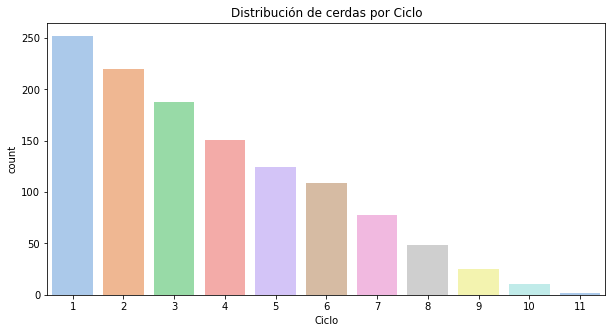

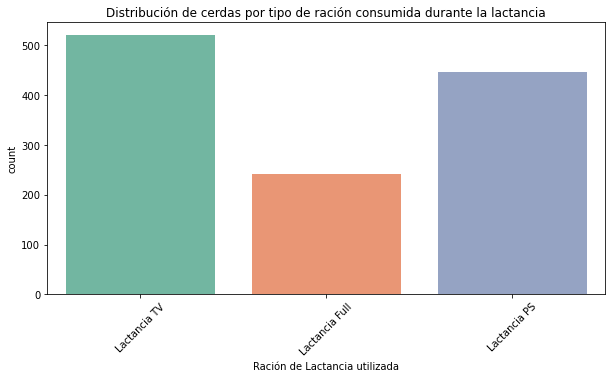

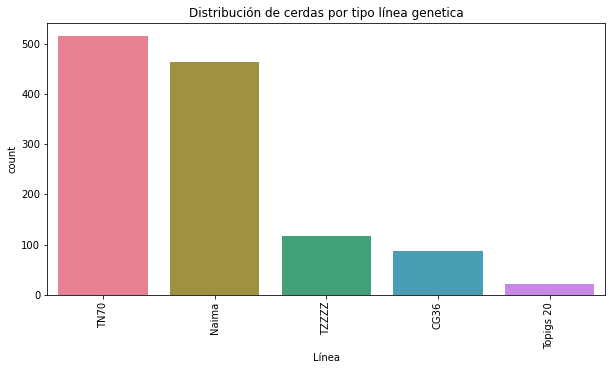

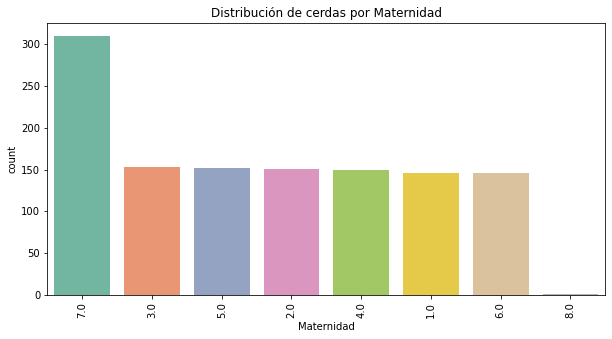

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=tabla_filt, x='Ciclo', palette='pastel', order = tabla_filt['Ciclo'].value_counts().index)
plt.title('Distribución de cerdas por Ciclo')
#plt.xticks(rotation=45)
#plt.savefig('Distribución por ciclo.pdf', format='pdf')
plt.show()

plt.figure(figsize=(10,5))#Esto debe hacerse antes del sns.countplot
sns.countplot(data=tabla_filt, x='Ración de Lactancia utilizada', palette='Set2')
plt.title('Distribución de cerdas por tipo de ración consumida durante la lactancia')
plt.xticks(rotation=45)
#plt.savefig('Distribución por ración.pdf', format='pdf')
plt.show()

#plt.figure(figsize=(10,5))#Esto debe hacerse antes del sns.countplot
#sns.countplot(data=tabla_filt, x='Ración de Lactancia utilizada', palette='Set2', hue='Línea')
#plt.title('Distribución de cerdas por tipo de ración consumida durante la lactancia y genetica')
#plt.xticks(rotation=45)
#plt.savefig('Distribución por ración.pdf', format='pdf')
#plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=tabla_filt, x='Línea', palette='husl', order = tabla_filt['Línea'].value_counts().index)
plt.title('Distribución de cerdas por tipo línea genetica')
plt.xticks(rotation=90)
#plt.savefig('Distribución por genetica.pdf', format='pdf')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=tabla_filt, x='Maternidad', palette='Set2', order = tabla_filt['Maternidad'].value_counts().index)
plt.title('Distribución de cerdas por Maternidad')
plt.xticks(rotation=90)
#plt.savefig('Distribución por maternidad.pdf', format='pdf')
plt.show()

Ahora mostramos como es la distribución de los datos de condición corporal de las cerdas a la entrada y salida de maternidad:

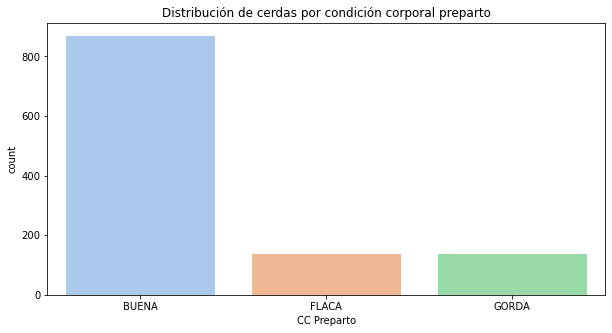

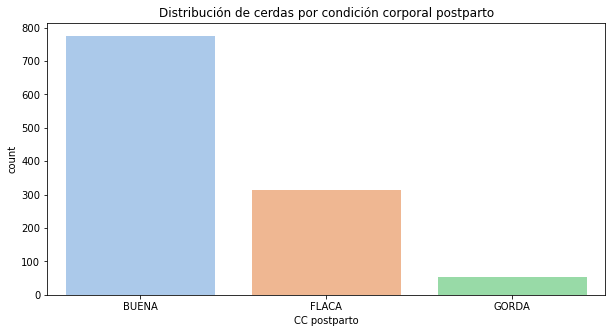

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=tabla_filt, x='CC Preparto', palette='pastel', order = tabla_filt['CC Preparto'].value_counts().index)
plt.title('Distribución de cerdas por condición corporal preparto')
#plt.xticks(rotation=45)
#plt.savefig('Distribución por ciclo.pdf', format='pdf')
plt.show()

plt.figure(figsize=(10,5))#Esto debe hacerse antes del sns.countplot
sns.countplot(data=tabla_filt, x='CC postparto', palette='pastel', order = tabla_filt['CC postparto'].value_counts().index)
plt.title('Distribución de cerdas por condición corporal postparto')
#plt.xticks(rotation=45)
#plt.savefig('Distribución por ración.pdf', format='pdf')
plt.show()

Ahora vemos como es la distribución de las variables numericas:

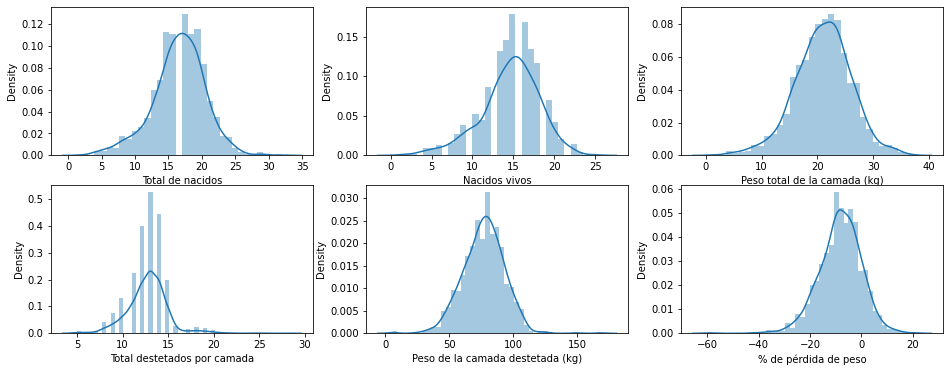

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(16,6))    

ax = sns.distplot(tabla_filt['Total de nacidos'], 
    ax=axes[0, 0]) 
ax = sns.distplot(tabla_filt['Nacidos vivos'],
    ax=axes[0, 1]) 
ax = sns.distplot(tabla_filt['Peso total de la camada (kg)'], 
    ax=axes[0, 2]) 
ax = sns.distplot(tabla_filt['Total destetados por camada'],
    ax=axes[1, 0]) 
ax = sns.distplot(tabla_filt['Peso de la camada destetada (kg)'], 
    ax=axes[1, 1]) 
ax = sns.distplot(tabla_filt['% de pérdida de peso'],
    ax=axes[1, 2]) 

plt.show()

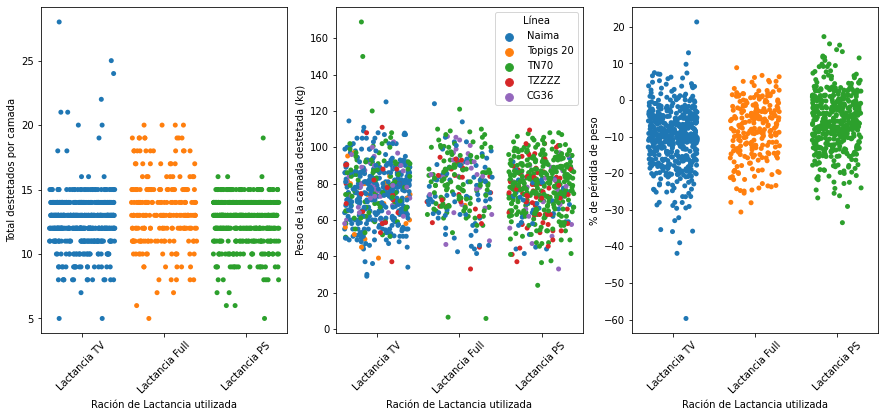

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.stripplot(x="Ración de Lactancia utilizada", y="Total destetados por camada", data=tabla_filt, jitter = 0.4, #hue= 'Línea',
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ración de Lactancia utilizada", y="Peso de la camada destetada (kg)", data=tabla_filt, jitter = 0.4, hue= 'Línea',
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ración de Lactancia utilizada", y="% de pérdida de peso", data=tabla_filt, jitter = 0.3, #hue= 'Línea',
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas por ración.pdf', format='pdf')
plt.show()

Vale la pena explicar ciertas consideraciones que son importantes para la evaluación de estos graficos. Se puede ver que para las raciones de 'Lactancia TV' y 'Lactancia Full' tenemos valores de total de destetados por camada mayores respecto a 'Lactancia PS'. Esto se debe, para el caso de la ración 'Lactancia TV', a que en ese momento se trabaja con un sistema de bandas semanales por lo que habia hembras que nodrizaban y por lo tanto destetaban dos camadas diferentes; ahora para el caso de la ración 'Lactancia Full', ya se habia dejado la banda semanal y se paso a trabajar con bandas cada 4 semanas por lo que las hembras ya no podían destetar dos camadas, pero lo que implementamos en ese momento fue probar cargar las hembras con 18, 19 0 20 lechones y utilizar leche para poder llevar adelante esa cantidad de lechones. Como conclusión, podemos decir que los mayores valores de total destetados por camada NO se deben al tipo de ración utilizada sino a diferentes formas de trabajo implementadas.


En el gráfico de % de pérdida de peso por tipo de ración de Lactancia utilizada, podemos observar mejores resultados (menor % de pérdida de peso) para las hembras que se les administro 'Lactancia PS'.

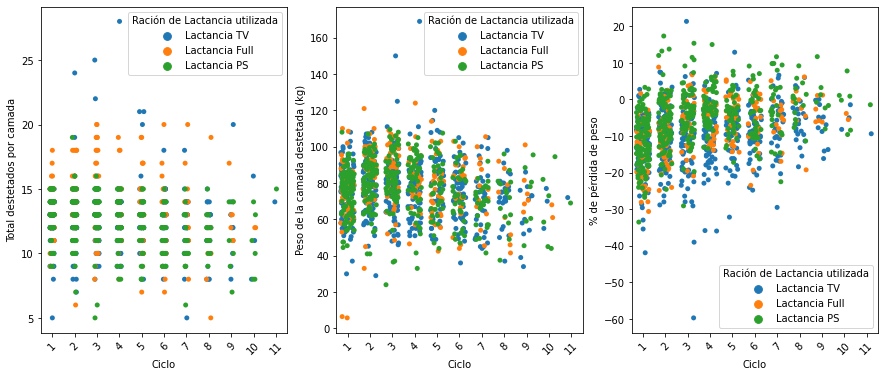

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.stripplot(x="Ciclo", y="Total destetados por camada", data=tabla_filt, hue = 'Ración de Lactancia utilizada',
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ciclo", y="Peso de la camada destetada (kg)", data=tabla_filt, jitter = 0.3, hue = 'Ración de Lactancia utilizada',
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ciclo", y="% de pérdida de peso", data=tabla_filt, jitter = 0.3, hue = 'Ración de Lactancia utilizada',
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas por ciclo.pdf', format='pdf')
plt.show()

Siguiendo con el % de pérdida de peso pero ahora teniendo en cuenta los ciclos de las hembras y el tipo de ración de Latancia utilizado, podemos observar como las mayores pérdidas de peso corresponden a 'Lactancia TV'(puntos azules) mientras que, tanto 'Lactancia Full' como 'Lactancia PS' mostraron menores pérdidas de peso.

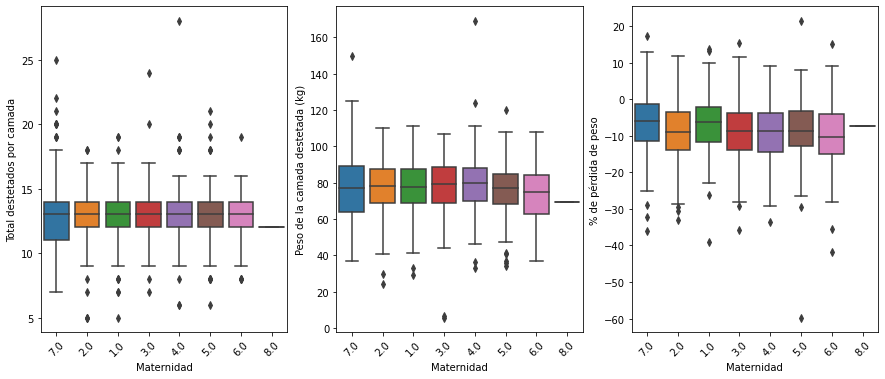

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.boxplot(x="Maternidad", y="Total destetados por camada", data=tabla_filt, orient='v', 
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.boxplot(x="Maternidad", y="Peso de la camada destetada (kg)", data=tabla_filt, orient='v', 
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.boxplot(x="Maternidad", y="% de pérdida de peso", data=tabla_filt, orient='v', 
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas por maternidad.pdf', format='pdf')
plt.show()

También evaluamos las salas de Maternidad, y se puede observar que las cerdas tuvieron mejores resultados (mayor peso de la camada destetada y sobre todo menor % de pérdida de peso) para las maternidades '1' y '7', mientras que los peores resultados se obtuvieron para las maternidades '5' y '6'. La causa de estos resultados esta relacionada al calor que sufren las cerdas en los meses de verano sobre todo en las maternidad '5' y '6'.

# EVALUAMOS DESEMPEÑO DE CERDAS DE CICLO 1 Y 2

Primero imprimimos la frecuencia de datos de cada ciclo que tenemos, para luego corroborar que se hayan seleccionados los datos de Ciclo 1 y 2 correctamente.

In [43]:
freq = tabla_filt['Ciclo'].value_counts() 
print('Frecuencia de cada ciclo:')
print(freq) 

Frecuencia de cada ciclo:
1     252
2     220
3     188
4     151
5     124
6     109
7      78
8      48
9      25
10     11
11      2
Name: Ciclo, dtype: int64


In [44]:
tabla_ciclo_1y2 = tabla_filt
tabla_ciclo_1y2 = tabla_ciclo_1y2[(tabla_ciclo_1y2['Ciclo'] == 1) | (tabla_ciclo_1y2['Ciclo'] == 2)]
tabla_ciclo_1y2.shape

(472, 24)

In [45]:
#Verificamos que en la columna ciclo queden solo cerdas de ciclo 1 y 2
tabla_ciclo_1y2['Ciclo'].unique()

array([1, 2])

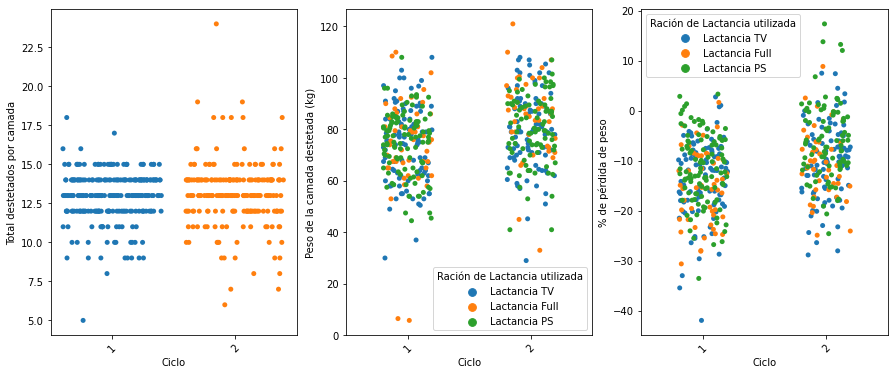

In [46]:
#Ahora graficamos las misma variables pero para cerdas de ciclo 1 y 2
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.stripplot(x="Ciclo", y="Total destetados por camada", data=tabla_ciclo_1y2, jitter = 0.4,
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ciclo", y="Peso de la camada destetada (kg)", data=tabla_ciclo_1y2, jitter = 0.2,  hue = 'Ración de Lactancia utilizada', 
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ciclo", y="% de pérdida de peso", data=tabla_ciclo_1y2,jitter = 0.2, hue = 'Ración de Lactancia utilizada',
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas ciclo 1 y 2.pdf', format='pdf')
plt.show()

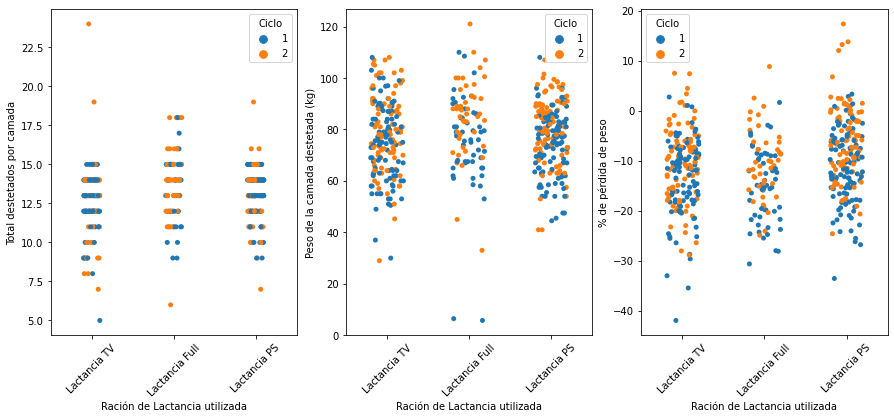

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.stripplot(x="Ración de Lactancia utilizada", y="Total destetados por camada", data=tabla_ciclo_1y2, hue= 'Ciclo',
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ración de Lactancia utilizada", y="Peso de la camada destetada (kg)", data=tabla_ciclo_1y2, hue='Ciclo', jitter = 0.2,
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ración de Lactancia utilizada", y="% de pérdida de peso", data=tabla_ciclo_1y2, hue='Ciclo', jitter = 0.2,
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

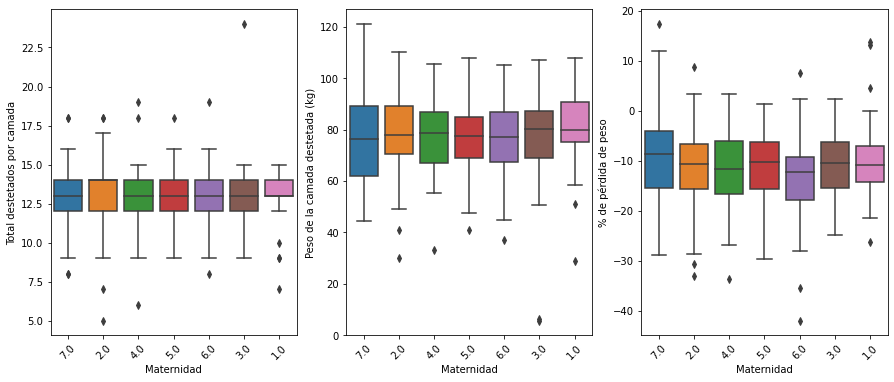

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.boxplot(x="Maternidad", y="Total destetados por camada", data=tabla_ciclo_1y2, orient='v', 
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.boxplot(x="Maternidad", y="Peso de la camada destetada (kg)", data=tabla_ciclo_1y2, orient='v', 
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.boxplot(x="Maternidad", y="% de pérdida de peso", data=tabla_ciclo_1y2, orient='v', 
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas ciclo 1-2 por maternidad.pdf', format='pdf')
plt.show()

# 2 PARTE

In [49]:
#Visualizamos la cantidad de filas y columnas.
print('Cantidad de filas: ' + str(tabla_con_IDC.shape[0])) #1253
print('Cantidad de columnas: ' + str(tabla_con_IDC.shape[1])) #26

Cantidad de filas: 1253
Cantidad de columnas: 26


In [50]:
#Visualizamos una porción del dataframe
tabla_con_IDC[400:408]

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso de la cerda cúaron (kg),Pérdida de peso (%),Balance energético,Nacidos totales sig. parto
510,2021.0,BANDA 0121,Naima,Choice,3.0,2020-08-22,2020-12-15,2021-01-07 00:00:00,Lactancia TV,6231,...,11.0,86,233,BUENA,23,4,273.16873,-0.172398,Negativo,23
511,2021.0,BANDA 0121,Naima,Choice,4.0,2020-08-22,2020-12-15,2021-01-07 00:00:00,Lactancia TV,7063,...,15.0,102,237,FLACA,23,4,294.00366,-0.240522,Negativo,20
512,2021.0,BANDA 0121,Naima,Choice,4.0,2020-08-23,2020-12-16,2021-01-07 00:00:00,Lactancia TV,5843,...,12.0,71,253,BUENA,22,4,287.63838,-0.136911,Negativo,17
513,2021.0,BANDA 0121,Naima,Choice,4.0,2020-08-23,2020-12-16,2021-01-07 00:00:00,Lactancia TV,7288,...,12.0,74,260,BUENA,22,4,285.96948,-0.099883,Neutro,18
514,2021.0,BANDA 0121,TN70,Topigs,4.0,2020-08-23,2020-12-18,2021-01-07 00:00:00,Lactancia TV,8523,...,14.0,82,198,BUENA,20,4,207.78173,-0.049403,Neutro,15
515,2021.0,BANDA 0121,TN70,Topigs,5.0,2020-09-02,2020-12-26,2021-01-11 00:00:00,Lactancia TV,1041,...,13.0,51.78,220,BUENA,16,6,228.51444,-0.038702,Neutro,20
516,2021.0,BANDA 0121,TZZZZ,Topigs,5.0,2020-08-30,2020-12-23,2021-01-11 00:00:00,Lactancia TV,GNTF9734,...,13.0,73.64,180,FLACA,19,4,212.22308,-0.179017,Negativo,13
519,2021.0,BANDA 0221,TN70,Topigs,1.0,2020-09-10,2021-01-02,2021-01-20 00:00:00,Lactancia TV,8416,...,12.0,79,184,BUENA,18,20,197.86194,-0.075337,Neutro,19


In [51]:
#Reemplazamos los valores nan y '-' por 0 para poder modificar el tipo de dato de str a entero.
#En columnas como IDC reemplazamos los valores por -1, ya que 0 es un valor posible.

tabla_con_IDC['Peso de la cerda pre-parto (kg)']=tabla_con_IDC['Peso de la cerda pre-parto (kg)'].replace( np.nan, 0)
tabla_con_IDC['Peso de la cerda pre-parto (kg)']=tabla_con_IDC['Peso de la cerda pre-parto (kg)'].replace( '-', 0)
tabla_con_IDC['Peso de la camada destetada (kg)']=tabla_con_IDC['Peso de la camada destetada (kg)'].replace( np.nan, 0)
tabla_con_IDC['Peso de la camada destetada (kg)']=tabla_con_IDC['Peso de la camada destetada (kg)'].replace( '-', 0)
tabla_con_IDC['Peso de la cerda post-parto (kg)']=tabla_con_IDC['Peso de la cerda post-parto (kg)'].replace( np.nan, 0)
tabla_con_IDC['Peso de la cerda post-parto (kg)']=tabla_con_IDC['Peso de la cerda post-parto (kg)'].replace( '-', 0)
tabla_con_IDC['Días de lactancia']=tabla_con_IDC['Días de lactancia'].replace( np.nan, 0)
tabla_con_IDC['Días de lactancia']=tabla_con_IDC['Días de lactancia'].replace( '-', 0)
tabla_con_IDC['Peso de la cerda cúaron (kg)']=tabla_con_IDC['Peso de la cerda cúaron (kg)'].replace( np.nan, 0)
tabla_con_IDC['Peso de la cerda cúaron (kg)']=tabla_con_IDC['Peso de la cerda cúaron (kg)'].replace( '-', 0)
tabla_con_IDC['Pérdida de peso (%)']=tabla_con_IDC['Pérdida de peso (%)'].replace( np.nan, -1)
tabla_con_IDC['Pérdida de peso (%)']=tabla_con_IDC['Pérdida de peso (%)'].replace( '-', -1)
tabla_con_IDC['IDC próximo servicio']=tabla_con_IDC['IDC próximo servicio'].replace( np.nan, -1)
tabla_con_IDC['IDC próximo servicio']=tabla_con_IDC['IDC próximo servicio'].replace( '-', -1)
tabla_con_IDC['Nacidos totales sig. parto']=tabla_con_IDC['Nacidos totales sig. parto'].replace( np.nan, 0)
tabla_con_IDC['Nacidos totales sig. parto']=tabla_con_IDC['Nacidos totales sig. parto'].replace( '-', 0)

In [52]:
tabla_con_IDC.head()

,Año,Grupo de servicio (a que va a pertenecer),Línea,Genética,Maternidad,Fecha servicio,Fecha de parto,Fecha destete,Ración de Lactancia utilizada,RP cerda,...,Total destetados por camada,Peso de la camada destetada (kg),Peso de la cerda post-parto (kg),CC postparto,Días de lactancia,IDC próximo servicio,Peso de la cerda cúaron (kg),Pérdida de peso (%),Balance energético,Nacidos totales sig. parto
2,2019.0,4819,Naima,Choice,7.0,2019-07-14,2019-11-06,2019-11-27 00:00:00,Lactancia TV,2252,...,11.0,65.0,219,NaN,21,4.0,289.43682,-0.321629,Negativo,22
3,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-07,2019-11-27 00:00:00,Lactancia TV,5167,...,15.0,107.0,178,NaN,20,4.0,242.01254,-0.359621,Negativo,14
4,2019.0,4819,Naima,Choice,7.0,2019-07-15,2019-11-10,2019-11-27 00:00:00,Lactancia TV,6043,...,12.0,55.0,177,NaN,17,13.0,195.66624,-0.105459,Negativo,0
5,2019.0,4819,Naima,Choice,7.0,2019-07-16,2019-11-09,2019-11-27 00:00:00,Lactancia TV,5119,...,8.0,55.0,167,NaN,18,20.0,186.27223,-0.115403,Negativo,0
8,2019.0,4919,Naima,Choice,2.0,2019-07-21,2019-11-12,2019-12-04 00:00:00,Lactancia TV,2181B,...,13.0,92.0,223,NaN,22,16.0,265.56755,-0.190886,Negativo,20


In [53]:
#Vemos la cantidad de valores nulos por columna luego de la modificación en IDC próximo servicio y Nacidos totales sig parto
tabla_con_IDC.isna().sum()

Año                                           0
Grupo de servicio (a que va a pertenecer)     0
Línea                                         1
Genética                                      1
Maternidad                                    0
Fecha servicio                                0
Fecha de parto                                0
Fecha destete                                15
Ración de Lactancia utilizada                 0
RP cerda                                      1
Ciclo                                         0
Peso de la cerda pre-parto (kg)               0
CC Preparto                                  71
Total de nacidos                              0
Nacidos vivos                                 0
Peso total de la camada (kg)                  0
Total destetados por camada                  16
Peso de la camada destetada (kg)              0
Peso de la cerda post-parto (kg)              0
CC postparto                                 89
Días de lactancia                       

In [54]:
tabla_con_IDC.dtypes

Año                                                 float64
Grupo de servicio (a que va a pertenecer)            object
Línea                                                object
Genética                                             object
Maternidad                                          float64
Fecha servicio                               datetime64[ns]
Fecha de parto                               datetime64[ns]
Fecha destete                                        object
Ración de Lactancia utilizada                        object
RP cerda                                             object
Ciclo                                               float64
Peso de la cerda pre-parto (kg)                       int64
CC Preparto                                          object
Total de nacidos                                    float64
Nacidos vivos                                       float64
Peso total de la camada (kg)                        float64
Total destetados por camada             

Tenemos la columna 'Nacidos totales sig. parto' con un tipo de dato como entero, por lo que me va a permitir trabajar bien. Ahora en la columna 'IDC próximo servicio' los datos son de tipo string, entonces para poder trabajar con ellos vamos a tener que cambiarlos a un tipo de dato númerico, para este caso con modificarlo a entero (int) estaría bien.

In [55]:
#Antes de modificar el tipo de dato, tenemos que cambiar en la columna los valores que figuran como 'REG'
tabla_con_IDC['IDC próximo servicio']=tabla_con_IDC['IDC próximo servicio'].replace( 'REG', -1)

In [56]:
#Modificamos los tipos de datos a str, int o float según corresponda

tabla_con_IDC['Maternidad'] = tabla_con_IDC['Maternidad'].astype('str')
tabla_con_IDC['Ciclo'] = tabla_con_IDC['Ciclo'].astype('int')
#tabla_con_IDC['Peso de la cerda pre-parto (kg)'] = tabla_con_IDC['Peso de la cerda pre-parto (kg)'].astype('int')
#tabla_con_IDC['Peso de la camada destetada (kg)'] = tabla_con_IDC['Peso de la camada destetada (kg)'].astype('float')
#tabla_con_IDC['Peso de la cerda post-parto (kg)'] = tabla_con_IDC['Peso de la cerda post-parto (kg)'].astype('int')
#tabla_con_IDC['Días de lactancia'] = tabla_con_IDC['Días de lactancia'].astype('int')
#tabla_con_IDC['Peso de la cerda cúaron (kg)'] = tabla_con_IDC['Peso de la cerda cúaron (kg)'].astype('int')
#tabla_con_IDC['Pérdida de peso (%)'] = tabla_con_IDC['Pérdida de peso (%)'].astype('float')
tabla_con_IDC['IDC próximo servicio'] = tabla_con_IDC['IDC próximo servicio'].astype('int')

#Ahora vemos si cada columna o variable presenta el tipo de dato adecuado para poder trabajar sin errores:
tabla_con_IDC.dtypes

Año                                                 float64
Grupo de servicio (a que va a pertenecer)            object
Línea                                                object
Genética                                             object
Maternidad                                           object
Fecha servicio                               datetime64[ns]
Fecha de parto                               datetime64[ns]
Fecha destete                                        object
Ración de Lactancia utilizada                        object
RP cerda                                             object
Ciclo                                                 int32
Peso de la cerda pre-parto (kg)                       int64
CC Preparto                                          object
Total de nacidos                                    float64
Nacidos vivos                                       float64
Peso total de la camada (kg)                        float64
Total destetados por camada             

Ahora vamos a pasar los datos de la columna 'Pérdida de peso (%)' a valores con porcentaje para lograr una mejor visualización de los valores:

In [57]:
#Multiplicamos por 100 la columna 'Pérdida de peso (%)' y generamos una columna nueva en donde se guarden esos resultados
tabla_con_IDC['% de pérdida de peso']=tabla_con_IDC['Pérdida de peso (%)']*100

####IMPORTANTE: Ejecutar esta celda de código más de una vez no modifica los valores de la columna creada??????

In [58]:
#Eliminamos la columna 'Pérdida de peso (%)'
tabla_con_IDC = tabla_con_IDC.drop(['Pérdida de peso (%)'], axis=1)
#Volvemos a visualizar el dataframe para comprobar la correcta eliminación:
tabla_con_IDC.shape

(1253, 26)

In [59]:
#tabla_con_IDC.head(3)

Primero vamos a visualizar la cantidad de datos que hay por cada día de IDC próximo servicio:

In [60]:
freq_IDC = tabla_con_IDC['IDC próximo servicio'].value_counts().sort_index()
print('Frecuencia de datos para IDC:')
print(freq_IDC) 

Frecuencia de datos para IDC:
-1     469
 0      15
 1       4
 2       7
 3      71
 4     287
 5     170
 6      46
 7      15
 8      10
 9       5
 10      9
 11     22
 12     13
 13      7
 14      3
 15      1
 16      2
 17     12
 18     12
 19      6
 20     10
 22      1
 24      2
 25     10
 26      3
 27      8
 28      1
 29      5
 30      2
 31      5
 32      9
 33      1
 34      2
 35      1
 39      1
 49      1
 55      1
 57      1
 58      1
 66      1
 72      1
Name: IDC próximo servicio, dtype: int64


Vemos que aparecen 469 datos con un valor de IDC próximo servicio igual -1. Aparecen de esta forma porque seguramente la tabla original tendría valores nulos (sin cargar) o cargados mal, por lo tanto procedimos a reemplazar esos valores por el -1 para luego eliminarlos, y así evitar que se confundan con datos cargados de forma correcta.

Ahora seguimos la misma metodología para la columna de 'Nacidos totales sig. parto':

In [61]:
freq_NT = tabla_con_IDC['Nacidos totales sig. parto'].value_counts().sort_index()
print('Frecuencia de datos para Nacidos totales:')
print(freq_NT)

Frecuencia de datos para Nacidos totales:
0     460
2       1
4       4
5       4
6       6
7       7
8      14
9      10
10     18
11     19
12     29
13     35
14     40
15     74
16     58
17     99
18     85
19     95
20     74
21     38
22     36
23     18
24     14
25     10
26      1
27      1
29      3
Name: Nacidos totales sig. parto, dtype: int64


Lo mismo ocurre para los datos que aparecen como 0 en la columna de Nacidos totales sig. parto, ya que sabemos que es imposible que esta valor sea 0. Por lo tanto reemplazamos los valores nulos originales del dataframe por ceros para luego poder eliminarlos y evitar confundirlos con datos cargados de forma correcta.

In [62]:
#tabla_finaaall = tabla_con_IDC[(tabla_con_IDC['IDC próximo servicio'] > -1) & (tabla_con_IDC['Nacidos totales sig. parto'] > 0)]

In [63]:
#Porque no tiene la misma cantidad de instancias o filas que tabla_final??????????
#tabla_finaaall.shape

In [64]:
tabla_final = tabla_con_IDC[tabla_con_IDC['IDC próximo servicio'] > -1]
print('Filas/Columnas luego de eliminar los valores -1 de IDC próximo servicio')
print(tabla_final.shape)
print()
tabla_final2 = tabla_final[tabla_final['IDC próximo servicio'] < 26]
print('Filas/Columnas luego de eliminar los valores mayores a 40 días de IDC próximo servicio') #esto es para poder gráficar mejor
print(tabla_final2.shape)
print()
tabla_final2 = tabla_final2[tabla_final2['% de pérdida de peso'] >= -40] #presentaba valores de % pérdida de peso de 100%
print('Filas/Columnas luego de eliminar los valores con pérdida de peso superior a 40%')
print(tabla_final2.shape)
print()
tabla_final3 = tabla_final2[tabla_final2['Nacidos totales sig. parto'] > 0]
print('Filas/Columnas luego de eliminar los valores mayores a 0 Nacidos totales sig. parto')
print(tabla_final3.shape)

Filas/Columnas luego de eliminar los valores -1 de IDC próximo servicio
(784, 26)

Filas/Columnas luego de eliminar los valores mayores a 40 días de IDC próximo servicio
(740, 26)

Filas/Columnas luego de eliminar los valores con pérdida de peso superior a 40%
(729, 26)

Filas/Columnas luego de eliminar los valores mayores a 0 Nacidos totales sig. parto
(531, 26)


In [65]:
#Hacemos un describe para conocer ciertos valores estadisticos para la tabla de IDC
tabla_final2[['Ciclo', 'Total de nacidos', 'Nacidos vivos', 'Total destetados por camada', 'Peso de la camada destetada (kg)', 
             'Días de lactancia', 'IDC próximo servicio', '% de pérdida de peso']].describe()

,Ciclo,Total de nacidos,Nacidos vivos,Total destetados por camada,Peso de la camada destetada (kg),Días de lactancia,IDC próximo servicio,% de pérdida de peso
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.508916,16.544582,14.779150,12.770919,77.905273,20.521262,5.986283,-7.767725
std,2.170036,3.933653,3.423706,1.890093,15.055560,2.366177,4.539791,7.849337
min,1.000000,2.000000,2.000000,5.000000,30.000000,14.000000,0.000000,-39.012863
25%,2.000000,14.000000,13.000000,12.000000,68.000000,20.000000,4.000000,-12.788638
50%,3.000000,17.000000,15.000000,13.000000,78.000000,20.000000,4.000000,-7.473895
75%,5.000000,19.000000,17.000000,14.000000,87.100000,21.000000,5.000000,-2.639701
max,11.000000,32.000000,25.000000,28.000000,169.000000,33.000000,25.000000,21.352316


In [66]:
#Hacemos un describe para conocer ciertos valores estadisticos para la tabla de Nacidos totales
tabla_final3[['Ciclo', 'Total de nacidos', 'Nacidos vivos', 'Total destetados por camada', 'Peso de la camada destetada (kg)', 
             'Días de lactancia', 'IDC próximo servicio', 'Nacidos totales sig. parto', '% de pérdida de peso']].describe()

,Ciclo,Total de nacidos,Nacidos vivos,Total destetados por camada,Peso de la camada destetada (kg),Días de lactancia,IDC próximo servicio,Nacidos totales sig. parto,% de pérdida de peso
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,3.595104,16.653484,14.841808,12.764595,77.710252,20.627119,6.346516,16.903955,-7.639604
std,2.162261,3.844683,3.340634,1.979887,15.453078,2.526154,4.954937,4.148676,8.014627
min,1.000000,4.000000,4.000000,5.000000,30.000000,14.000000,0.000000,2.000000,-39.012863
25%,2.000000,14.500000,13.000000,12.000000,67.815000,20.000000,4.000000,15.000000,-12.781814
50%,3.000000,17.000000,15.000000,13.000000,78.000000,20.000000,4.000000,17.000000,-7.258779
75%,5.000000,19.000000,17.000000,14.000000,87.000000,21.000000,6.000000,20.000000,-2.530168
max,10.000000,32.000000,25.000000,28.000000,169.000000,33.000000,25.000000,29.000000,15.372046


In [67]:
#Hacemos la matriz de correlaciones para ver como impactan en las variables IDC próximo servicio
tabla_final2[['Ciclo','Total de nacidos', 'Nacidos vivos', 'Total destetados por camada', 'Peso de la camada destetada (kg)', 
             'IDC próximo servicio', 'Días de lactancia', '% de pérdida de peso']].corr()

,Ciclo,Total de nacidos,Nacidos vivos,Total destetados por camada,Peso de la camada destetada (kg),IDC próximo servicio,Días de lactancia,% de pérdida de peso
Ciclo,1.000000,0.165418,0.109256,-0.108512,-0.045410,-0.077652,-0.001441,0.220691
Total de nacidos,0.165418,1.000000,0.845500,0.021421,-0.116817,-0.022119,0.042364,-0.081870
Nacidos vivos,0.109256,0.845500,1.000000,0.100004,-0.048340,-0.067803,0.010839,-0.022971
Total destetados por camada,-0.108512,0.021421,0.100004,1.000000,0.648012,0.005396,0.037794,-0.133769
Peso de la camada destetada (kg),-0.045410,-0.116817,-0.048340,0.648012,1.000000,-0.013879,0.298990,-0.084083
IDC próximo servicio,-0.077652,-0.022119,-0.067803,0.005396,-0.013879,1.000000,0.125984,-0.197215
Días de lactancia,-0.001441,0.042364,0.010839,0.037794,0.298990,0.125984,1.000000,-0.035200
% de pérdida de peso,0.220691,-0.081870,-0.022971,-0.133769,-0.084083,-0.197215,-0.035200,1.000000


La variable que mayor correlación (en este caso negativa) tiene con IDC próximo servicio es '% de pérdida de peso', o sea, que mayor pérdida de peso más se extendera la entrada en celo de la cerda postdestete. La de mayor correlación positiva es 'Días de lactancia', por lo tanto, cuanto más días de lactancia (obviamente hasta los 23 o 24 días) más rapido presentara celo la cerda luego del destete.

In [68]:
#Hacemos la matriz de correlaciones para ver como impactan en las variables IDC próximo servicio y Nacidos totales sig. parto
tabla_final3[['Ciclo','Total de nacidos', 'Nacidos vivos', 'Total destetados por camada', 'Peso de la camada destetada (kg)', 
             'IDC próximo servicio', 'Días de lactancia', '% de pérdida de peso', 'Nacidos totales sig. parto']].corr()

,Ciclo,Total de nacidos,Nacidos vivos,Total destetados por camada,Peso de la camada destetada (kg),IDC próximo servicio,Días de lactancia,% de pérdida de peso,Nacidos totales sig. parto
Ciclo,1.000000,0.133114,0.080449,-0.120590,-0.039631,-0.068065,-0.016984,0.220813,0.065066
Total de nacidos,0.133114,1.000000,0.828231,0.017273,-0.124867,0.004136,0.020668,-0.070282,0.341192
Nacidos vivos,0.080449,0.828231,1.000000,0.093062,-0.064223,-0.053220,-0.016617,-0.013075,0.256070
Total destetados por camada,-0.120590,0.017273,0.093062,1.000000,0.660848,0.012562,0.036363,-0.129322,0.018375
Peso de la camada destetada (kg),-0.039631,-0.124867,-0.064223,0.660848,1.000000,-0.007250,0.313690,-0.094911,0.019700
IDC próximo servicio,-0.068065,0.004136,-0.053220,0.012562,-0.007250,1.000000,0.155353,-0.199034,-0.005078
Días de lactancia,-0.016984,0.020668,-0.016617,0.036363,0.313690,0.155353,1.000000,-0.063573,0.120440
% de pérdida de peso,0.220813,-0.070282,-0.013075,-0.129322,-0.094911,-0.199034,-0.063573,1.000000,0.070855
Nacidos totales sig. parto,0.065066,0.341192,0.256070,0.018375,0.019700,-0.005078,0.120440,0.070855,1.000000


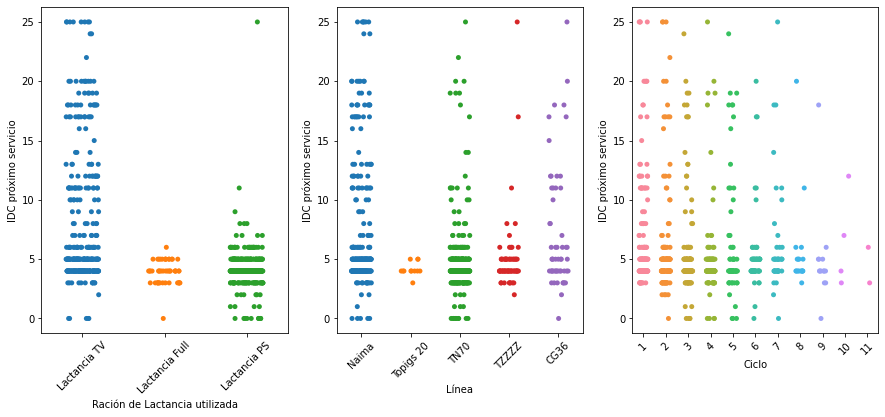

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.stripplot(x="Ración de Lactancia utilizada", y="IDC próximo servicio", data=tabla_final2, jitter = 0.2, #hue= 'Línea',
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Línea", y="IDC próximo servicio", data=tabla_final2, jitter = 0.2,
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ciclo", y="IDC próximo servicio", data=tabla_final2, jitter = 0.2,
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas IDC.pdf', format='pdf')
plt.show()

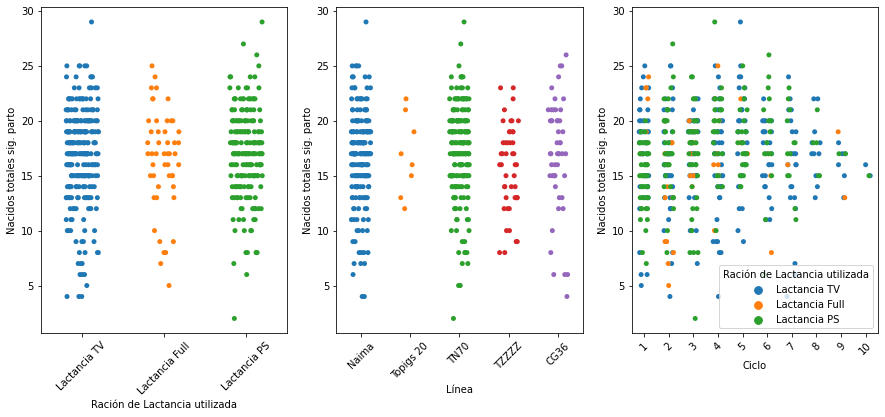

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))    

ax = sns.stripplot(x="Ración de Lactancia utilizada", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.2, #hue= 'Línea',
    ax=axes[0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Línea", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.2,
    ax=axes[1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax = sns.stripplot(x="Ciclo", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.2, hue = 'Ración de Lactancia utilizada',
    ax=axes[2])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.savefig('Graficas nacidos totales sig. parto.pdf', format='pdf')
plt.show()

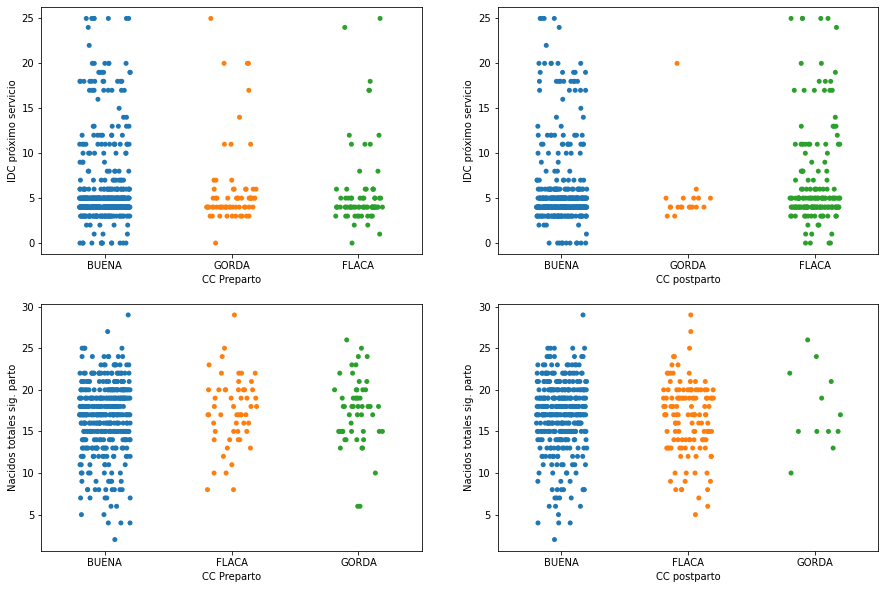

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))    

ax = sns.stripplot(x="CC Preparto", y="IDC próximo servicio", data=tabla_final2, jitter = 0.2, #hue= 'Ración de Lactancia utilizada',
    ax=axes[0,0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax = sns.stripplot(x="CC postparto", y="IDC próximo servicio", data=tabla_final2, jitter = 0.2, #hue= 'Ración de Lactancia utilizada',
    ax=axes[0,1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax = sns.stripplot(x="CC Preparto", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.2, #hue= 'Ración de Lactancia utilizada',
    ax=axes[1,0])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax = sns.stripplot(x="CC postparto", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.2, #hue= 'Ración de Lactancia utilizada',
    ax=axes[1,1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
#plt.savefig('Graficas IDC.pdf', format='pdf')
plt.show()

Ahora hacemos los mismos gráficos de arriba pero diferenciados por 'Ración de Lactancia utilizada':

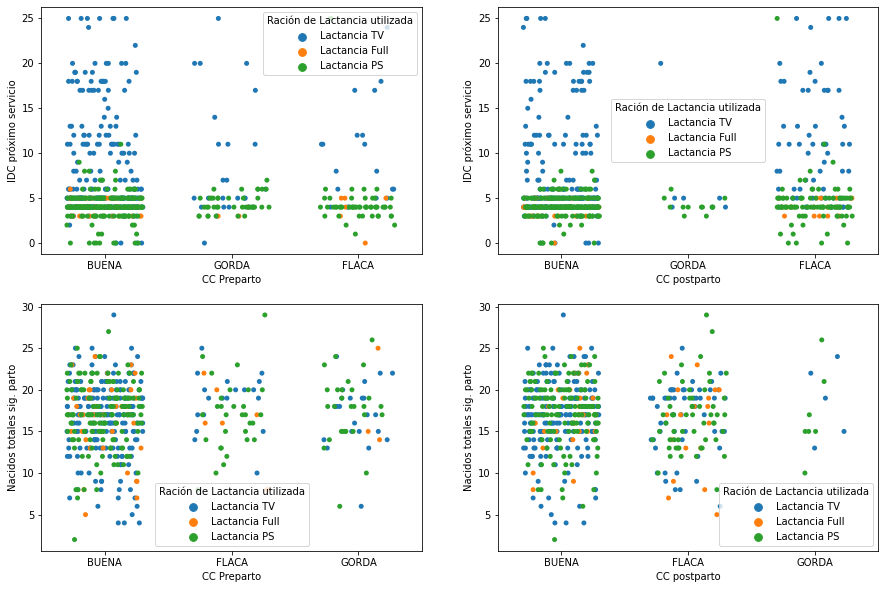

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))    

ax = sns.stripplot(x="CC Preparto", y="IDC próximo servicio", data=tabla_final2, jitter = 0.3, hue= 'Ración de Lactancia utilizada',
    ax=axes[0,0]) 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax = sns.stripplot(x="CC postparto", y="IDC próximo servicio", data=tabla_final2, jitter = 0.3, hue= 'Ración de Lactancia utilizada',
    ax=axes[0,1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax = sns.stripplot(x="CC Preparto", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.3, hue= 'Ración de Lactancia utilizada',
    ax=axes[1,0])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax = sns.stripplot(x="CC postparto", y="Nacidos totales sig. parto", data=tabla_final3, jitter = 0.3, hue= 'Ración de Lactancia utilizada',
    ax=axes[1,1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
#plt.savefig('Graficas IDC.pdf', format='pdf')
plt.show()

Se puede observar que las cerdas que fueron alimentadas con 'Lactancia PS' tuvieron un IDC próximo servicio menor (presentaron celo mas rápido) para las tres categorias de condición corporal en comparación con las otras lactancias utilizadas. Pero para la variable 'Nacidos totales sig. parto' no hay una marcada diferencia entre lactancias, como se puede observar en la nube de puntos para las tres categorias de condición corporal que la distribución de estos punto es bastante homogénea.